------- 2
---- 4 [«5B 0:0.375 3/8♩», «5A# 0.375:0.75 3/8♩», «6D 0.75:1.5 3/4♩», «5G# 1.5:1.688 3/16♩», «5A~ 1.688:1.75 1/16♩», «~5A 1.75:1.875 1/8♩ attachments=[Breath(horizontalPlacement=pre, placement=above)]», «5B 1.875:2.062 3/16♩», «6C# 2.062:2.25 3/16♩», «5A# 2.25:2.438 3/16♩», «6C 2.438:2.625 3/16♩», «6D 2.625:2.812 3/16♩», «6E 2.812:3 3/16♩», «6F# 3:4 1♩»] ('treble15', 'treble')
----- 3 [UnquantizedPart(notations=[«rest 0:0.375 3/8♩», «rest 0.375:0.75 3/8♩», «rest 0.75:1.5 3/4♩», «rest 1.5:1.688 3/16♩», «rest 1.688:1.75 1/16♩», «rest 1.75:1.875 1/8♩», «rest 1.875:2.062 3/16♩», «rest 2.062:2.25 3/16♩», «rest 2.25:2.438 3/16♩», «rest 2.438:2.625 3/16♩», «rest 2.625:2.812 3/16♩», «rest 2.812:3 3/16♩», «6F# 3:4 1♩»], attachments=[], groupid=, hooks=[], name=, shortname=, showName=True), UnquantizedPart(notations=[«5B 0:0.375 3/8♩», «5A# 0.375:0.75 3/8♩», «6D 0.75:1.5 3/4♩», «5G# 1.5:1.688 3/16♩», «5A~ 1.688:1.75 1/16♩», «~5A 1.75:1.875 1/8♩ attachments=[Breath(horizontalPlacement=p

Chain([5B:0.375♩, 5A♯:0.375♩, 6D:0.75♩, 5G♯:0.188♩, 5A:0.188♩, 5B:0.188♩, 6C♯:0.188♩, 5A♯:0.188♩, 6C:0.188♩, 6D:0.188♩, …])
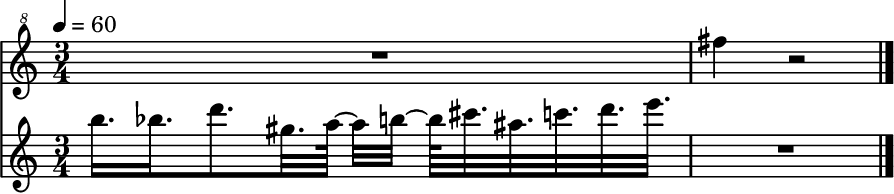

In [1]:
from maelzel.core import *
from maelzel.core import symbols

Workspace.setScoreStruct(timesig=(3, 4))

chain = Chain([
    Note("5B", F(1, 4)+F(1, 8)),
    Note("5Bb", F(1, 4)+F(1, 8)),
    Note("6D", F(3, 4)),
    
    Note("5G#", F(1, 4)*F(3, 4)),
    Note("5A", F(1, 4)*F(3, 4)),
    Note("5B", F(1, 4)*F(3, 4)),
    Note("6C#", F(1, 4)*F(3, 4)),

    Note("5Bb", F(1, 4)*F(3, 4)),
    Note("6C", F(1, 4)*F(3, 4)),
    Note("6D", F(1, 4)*F(3, 4)),
    Note("6E", F(1, 4)*F(3, 4)),

    Note("6F#", 1)
    
]).setPlay(instr='.piano')
# chain.splitAt(1, beambreak=False)

chain.beamBreak(1.75)

chain


Chain([5B:0.375♩, 5A♯:0.375♩, 6D:0.75♩, 5G♯:0.188♩, 5A:0.188♩, 5B:0.188♩, 6C♯:0.188♩:symbols=[Ornament(kind=mordent)], 5A♯:0.188♩, 6C:0.188♩:symbols=[Tremolo(nummarks=2, tremtype=single)], 6D:0.188♩, …])
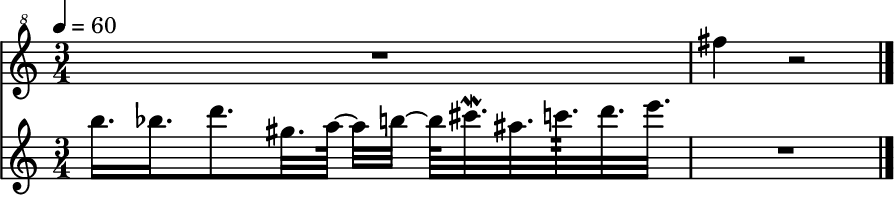

In [2]:
chain.eventAt(2.1).addSymbol('mordent')
chain.eventAt(2.5).addSymbol('tremolo')
chain

Chain([5B:0.375♩, 5A♯:0.375♩, 6D:0.75♩, 5G♯:0.188♩, 5A:0.188♩, 5B:0.188♩, 6C♯:0.188♩:symbols=[Ornament(kind=mordent)], 5A♯:0.188♩, 6C:0.188♩:symbols=[Tremolo(nummarks=2, tremtype=single), Breath(horizontalPlacement=post)], 6D:0.188♩, …])
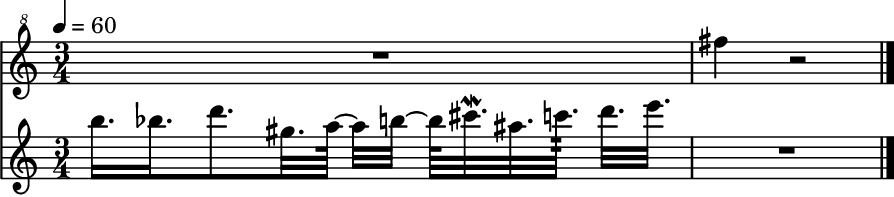

In [3]:
chain.eventAt(2.5).addSymbol(symbols.Breath(visible=False, horizontalPlacement='post'))
chain

[maelzel.scoring:quant.py:1361:quantizeMeasure:DEBUG] Measure 3/4 is not filled (events=[«rest 0:1 1♩ attachments=[Breath(horizontalPlacement=post, placement=above)] properties={'.mergeableNext': False}»]). Filling gaps with silences
[maelzel.scoring:node.py:852:asTree:DEBUG] tree: Node(1/1, 
    Node(1/1, «rest 1:2 1♩»)
    Node(1/1, «rest 2:3 1♩»))
[maelzel.scoring:quant.py:1694:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, «rest 0:1 1♩ attachments=[Breath(horizontalPlacement=post, placement=above)] properties={'.mergeableNext': False}»)
Node(1/1, «rest 1:2 1♩»)
----> Cannot merge notations
[maelzel.scoring:quant.py:1688:_mergeSiblings:DEBUG] Nodes can merge:
Node(1/1, «rest 1:2 1♩»)
Node(1/1, «rest 2:3 1♩»)
[maelzel.scoring:quant.py:1490:_mergeNodes:DEBUG] ---- Merged: Node(1/1, «rest 1:3 2♩»)
[maelzel.scoring:quant.py:1691:_mergeSiblings:DEBUG] ---- Merged node:
Node(1/1, «rest 1:3 2♩»)
[maelzel.scoring:quant.py:1705:_mergeSiblings:DEBUG] ---- New root: Node(1/1, 
    Node(1

[UnquantizedPart(notations=[«rest 0:1 1♩ attachments=[Breath(horizontalPlacement=post, placement=above)] properties={'.mergeableNext': False}»], attachments=[], groupid=, hooks=[], name=, shortname=, showName=True)]
Part #0:
  Measure #0
    Timesig: 3/4(quarter=60)
    QuantizedBeat(divisions=(1,), assignedSlots=[0], beatDuration=1, beatOffset=0, quantizationError=0)
      «rest 0:1 1♩ attachments=[Breath(horizontalPlacement=post, placement=above)] properties={'.mergeableNext': False}»
    QuantizedBeat(divisions=(1,), assignedSlots=[0], beatDuration=1, beatOffset=1, quantizationError=0)
      «rest 1:2 1♩»
    QuantizedBeat(divisions=(1,), assignedSlots=[0], beatDuration=1, beatOffset=2, quantizationError=0)
      «rest 2:3 1♩»



[maelzel.scoring:renderlily.py:1191:write:DEBUG] Found crop file '/home/em/.cache/tmpgeysi04a/y6mfov45.cropped.png', using that as output
[maelzel.scoring:renderlily.py:1201:write:DEBUG] Moving /home/em/.cache/tmpgeysi04a/y6mfov45.cropped.png to /home/em/.cache/tmpgeysi04a/s3vzbl4o.png


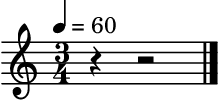

In [4]:
from maelzel.core import *
from maelzel.core import symbols
from maelzel import scoring
scoring.logger.setLevel("DEBUG")

n = Note(0, 1)
n.addSymbol(symbols.Breath(visible=False, horizontalPlacement='post'))
print(n.scoringParts())
print(n.quantizedScore())
n.show()

In [6]:
from maelzel.core import *
n = Note(0, 1)
print(n.scoringEvents())
n.quantizedScore().dump(tree=True)

[«rest 0:1 1♩»]
Part #0:
  Measure #0
    Timesig: 4/4(quarter=60)
    Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
      Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
        «rest 0:4 4♩ attachments=[Breath(horizontalPlacement=post, placement=above)]»


Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
  Node ratio: 1/1, offset=0, end=1, dur=1, symbolicdur=1
    «rest 0:1 1♩ attachments=[Breath(horizontalPlacement=post, placement=above)]
      properties={'.mergeableNext': False}»
  Node ratio: 1/1, offset=1, end=4, dur=3, symbolicdur=3
    «rest 1:4 3♩»


Rest:1♩
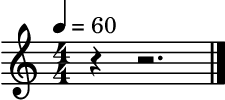

In [1]:
from maelzel.core import *
n = Note(0, 1)
# n.addSymbol(symbols.NoMerge(next=True))
n

In [2]:
root = n.quantizedScore()[0][0].tree

Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
  Node ratio: 1/1, offset=0, end=1, dur=1, symbolicdur=1
    «rest 0:1 1♩ attachments=[Breath(horizontalPlacement=post, placement=above)]
      properties={'.mergeableNext': False}»
  Node ratio: 1/1, offset=1, end=4, dur=3, symbolicdur=3
    «rest 1:4 3♩»


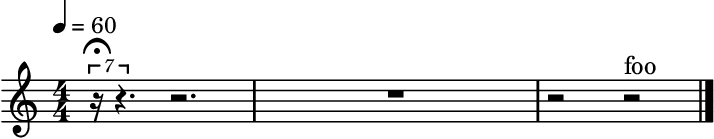

In [1]:
from maelzel.core import *

ch = Chain([Rest(1/7).addSymbol(symbols.Fermata(merge=False)), Rest(0.5, offset=10, label='foo')])
# ch.show()
ch.show()

In [2]:
qsc = ch.quantizedScore()
qsc.dump(tree=True)

Part #0:
  Measure #0
    Timesig: 4/4(quarter=60)
    Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
      Node ratio: 7/4, offset=0, end=1, dur=1, symbolicdur=7/4
        «rest 0:0.143 1/7♩ 7/4 attachments=[Fermata(kind=normal)] properties={'.mergeableNext':
          False}»
        «rest 0.143:1 6/7♩ 7/4»
      «rest 1:4 3♩»
  Measure #1
    Timesig: 4/4(quarter=60)
    Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
      «rest 0:4 4♩»
  Measure #2
    Timesig: 4/4(quarter=60)
    Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
      «rest 0:2 2♩»
      «rest 2:4 2♩ attachments=[Text(text=foo, placement=above, role=label)]»


In [14]:
root = qsc[0][1].tree

In [15]:
root.items[0].durRatio == root.durRatio

True

In [18]:
r = qsc[0][1].tree

In [22]:
r._removeUnnecessaryNodes().dump()

Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
  «rest 0:4 4♩»


In [1]:
from maelzel.scoring.core import Notation
from maelzel.scoring import attachment

In [2]:
n0 = Notation.makeRest(1, offset=0)
n1 = Notation.makeRest(1, offset=1)
n1.addAttachment(attachment.Text('foo'))


«rest 1:2 1♩ attachments=[Text(text=foo)]»

In [3]:
n0.canMergeWith(n1)

False